**GRIP** (Graduate Rotational Internship Program) - **THE SPARKS FOUNDATION**

# **DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP** 



---



**Task 1:** Prediction using Supervised Machine Learning

**Problem Statement:** Predict the percentage of a student based on the number of hours he/she studied per day.

**AUTHOR:** VENKATA SUBHASH MOVVA



---



# **Importing Data**

In [42]:
# Importing required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [43]:
# Loading Data

url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
stu_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes




---


**Attempt to find any relationship between data**

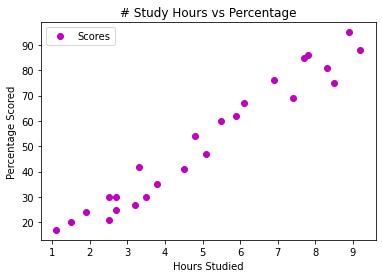

In [45]:
# Plotting the data

stu_data.plot(x = 'Hours', y = 'Scores', style = 'mo')  
plt.title('# Study Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

Graph indicates **positive** linear relationship between the variables **'Hours'** and **'Scores'**


---



# **Data Preparation**
Dividing the data into attributes and labels

In [46]:
X = stu_data.iloc[:, :-1].values # Hours
y = stu_data.iloc[:, 1].values # Scores 

Splitting the data into training and test sets 

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# **Training the algorithm**

In [48]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


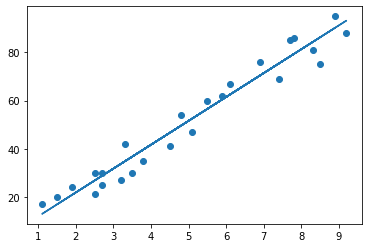

In [49]:
# Plotting the regression line

line = regressor.coef_ * X + regressor.intercept_ # line equation

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

# **Making Predictions**

In [50]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [51]:
y_pred = regressor.predict(X_test) # Predicting the scores

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing with our own data

In [52]:
# Function to predict the student's percentage based on no. of hours he/she studied per day

def prediction(x):
  hours = np.array([x])
  hours = hours.reshape(-1, 1)
  own_pred = regressor.predict(hours)
  print("No. of Hours = {}".format(float(hours)))
  print("Predicted Score = {}".format(round(own_pred[0], 2))) 

In [53]:
# Predicting the score, if a student studies for 9.25 hrs/day?

prediction(9.25)

No. of Hours = 9.25
Predicted Score = 93.69


In [54]:
# Predicting the score, if a student studies for 6.5 hrs/day?

prediction(6.5)

No. of Hours = 6.5
Predicted Score = 66.44


# **Model Evaluation**

Evaluating the performance of our algorithm

In [55]:
from sklearn import metrics  

# Mean Absolute Error
mse = (metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:", mse)

# Root Mean Squared Error
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error:", rmse)

# Coefficient of Determination
r2 =  metrics.r2_score(y_test, y_pred)
print("R-Square:", r2)

Mean Absolute Error: 4.183859899002982
Root Mean Squared Error: 4.647447612100373
R-Square: 0.9454906892105354
